<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Linegraphs(--line).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Graph Notebook
Used to visualite line graphs of food availability over time, per region and workldwide. 

In [1]:
import pylab
import pandas as pd
import numpy as math
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

0 Fetching the Food Aid data we want to include in the line graphs

In [2]:
data_path = 'gfa25.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1')
general_df.head()

FileNotFoundError: ignored

In [ ]:
intermediate_food_aid_df = general_df[(general_df.Commodity == "Food Aid")]
food_aid_df = intermediate_food_aid_df[intermediate_food_aid_df.Item == 'Cereal Food Aid']
food_aid_df = food_aid_df.reset_index(drop = True)
food_aid_df.rename(columns = {'Amount': 'Cereal Food Aid (Grain Equiv. 1000MT)'}, inplace = True)
food_aid_df.drop(['Commodity', 'Item', 'Unit'], axis=1, inplace = True)
food_aid_df.head()


,Country,Year,Cereal Food Aid (Grain Equiv. 1000MT)
0,Algeria,1988.0,8.902811
1,Algeria,1989.0,36.557491
2,Algeria,1990.0,4.608922
3,Algeria,1991.0,39.210113
4,Algeria,1992.0,10.904214


In [ ]:

food_noncaid_df = intermediate_food_aid_df[intermediate_food_aid_df.Item == 'Non-Cereal Food Aid']
food_noncaid_df = food_noncaid_df.reset_index(drop = True)
food_noncaid_df.rename(columns = {'Amount': 'Non-Cereal Food Aid (Grain Equiv. 1000MT)'}, inplace = True)
food_noncaid_df.drop(['Commodity', 'Item', 'Unit'], axis=1, inplace = True)
food_noncaid_df.head()

,Country,Year,Non-Cereal Food Aid (Grain Equiv. 1000MT)
0,Algeria,1988.0,13.163940
1,Algeria,1989.0,9.759403
2,Algeria,1990.0,5.521550
3,Algeria,1991.0,3.351595
4,Algeria,1992.0,7.787651


In [ ]:
all_foodaid_df = [food_noncaid_df, food_aid_df]
all_foodaid_df = reduce(lambda  left,right: pd.merge(left,right,
                       on=['Country', 'Year'], 
                       how='outer'), all_foodaid_df).fillna(pd.NaT)    

all_foodaid_df.sort_values(by=['Country', 'Year'], inplace = True)
all_foodaid_df.reset_index(drop = True)
all_foodaid_df['Total Food Aid'] = all_foodaid_df['Non-Cereal Food Aid (Grain Equiv. 1000MT)'] + all_foodaid_df['Cereal Food Aid (Grain Equiv. 1000MT)']
all_foodaid_df['Total Food Aid'] = all_foodaid_df['Total Food Aid'].astype(float)
all_foodaid_df

,Country,Year,Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Total Food Aid
0,Algeria,1988.0,13.163940,8.902811,22.066751
1,Algeria,1989.0,9.759403,36.557491,46.316894
2,Algeria,1990.0,5.521550,4.608922,10.130472
3,Algeria,1991.0,3.351595,39.210113,42.561708
4,Algeria,1992.0,7.787651,10.904214,18.691865
...,...,...,...,...,...
396,Uganda,2009.0,24.113565,136.469708,160.583274
397,Uganda,2010.0,17.836241,88.628585,106.464827
398,Uganda,2011.0,6.645033,84.150236,90.795268
399,Uganda,2012.0,20.897387,52.833542,73.730929


In [ ]:
pop_df = general_df[general_df.Item == 'Total Population - Both Sexes']
pop_df = pop_df.reset_index(drop = True)
pop_df.rename(columns = {'Amount': 'Population in Million'}, inplace = True)
pop_df.drop(['Commodity', 'Item', 'Unit'], axis=1, inplace = True)
pop_df.head()

,Country,Year,Population in Million
0,Algeria,1980.0,18.811
1,Algeria,1981.0,19.442
2,Algeria,1982.0,20.096
3,Algeria,1983.0,20.763
4,Algeria,1984.0,21.433


In [ ]:
all_foodaid_df = [food_noncaid_df, food_aid_df, pop_df]
all_foodaid_df = reduce(lambda  left,right: pd.merge(left,right,
                       on=['Country', 'Year'], 
                       how='outer'), all_foodaid_df).fillna(pd.NaT)    

all_foodaid_df.sort_values(by=['Country', 'Year'], inplace = True)
all_foodaid_df.reset_index(drop = True)
all_foodaid_df['Total Food Aid'] = all_foodaid_df['Non-Cereal Food Aid (Grain Equiv. 1000MT)'] + all_foodaid_df['Cereal Food Aid (Grain Equiv. 1000MT)']
all_foodaid_df['Total Food Aid kg/cap/year'] = (all_foodaid_df['Non-Cereal Food Aid (Grain Equiv. 1000MT)'] + all_foodaid_df['Cereal Food Aid (Grain Equiv. 1000MT)'])/all_foodaid_df['Population in Million']
all_foodaid_df['Total Food Aid kg/cap/year'] = all_foodaid_df['Total Food Aid kg/cap/year'].astype(float)
all_foodaid_df

,Country,Year,Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Population in Million,Total Food Aid,Total Food Aid kg/cap/year
551,Algeria,1980.0,NaT,NaT,18.811,NaT,NaN
552,Algeria,1981.0,NaT,NaT,19.442,NaT,NaN
553,Algeria,1982.0,NaT,NaT,20.096,NaT,NaN
554,Algeria,1983.0,NaT,NaT,20.763,NaT,NaN
555,Algeria,1984.0,NaT,NaT,21.433,NaT,NaN
...,...,...,...,...,...,...,...
737,Zambia,1984.0,NaT,NaT,6.575,NaT,NaN
738,Zambia,1985.0,NaT,NaT,6.785,NaT,NaN
739,Zambia,1986.0,NaT,NaT,6.998,NaT,NaN
740,Zambia,1987.0,NaT,NaT,7.214,NaT,NaN


1 Regrouping all countries' to display the LCD's development

In [3]:
data_path = '/content/df_final(no_missing values,regions).csv'
df_no_missing_valuesr = pd.read_csv(data_path, encoding ='latin-1')
df_no_missing_valuesr["Exports (all) per capita (kg/cap/year)"] = -1 * df_no_missing_valuesr["Exports (all) per capita (kg/cap/year)"]
df_no_missing_valuesr


,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Total Food Aid kg/cap/year,Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Region
0,Algeria,1988,218.458482,1267.207343,5368.040,0.342,39.047062,0.097241,24.035,0.918109,5407.087062,0.439241,52.723418,224.967217,-0.018275,277.672360,North Africa
1,Algeria,1989,217.210697,2259.764449,8090.373,0.000,40.698205,0.000000,24.668,1.877610,8131.071205,0.000000,91.607121,329.620205,-0.000000,421.227325,North Africa
2,Algeria,1990,230.949959,1831.752091,4595.300,0.000,44.264406,0.113870,25.299,0.400430,4639.564406,0.113870,72.404130,183.389241,-0.004501,255.788870,North Africa
3,Algeria,1991,239.859144,4082.130235,4385.000,0.000,41.248665,0.000000,25.931,1.641345,4426.248665,0.000000,157.422785,170.693327,-0.000000,328.116112,North Africa
4,Algeria,1992,222.393113,3623.871137,3922.700,0.000,21.734742,0.723534,26.558,0.703813,3944.434742,0.723534,136.451206,148.521528,-0.027244,284.945491,North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,Zimbabwe,2008,153.700079,932.603469,1007.425,0.000,0.545611,0.004930,12.452,32.483310,1007.970611,0.004930,74.895878,80.948491,-0.000396,155.843973,Southern Africa
1779,Zimbabwe,2009,141.317483,1677.731196,576.300,0.000,2.163975,0.014400,12.474,23.016895,578.463975,0.014400,134.498252,46.373575,-0.001154,180.870673,Southern Africa
1780,Zimbabwe,2010,136.990970,1723.572567,368.600,0.000,2.163975,0.014400,12.571,7.819579,370.763975,0.014400,137.107037,29.493594,-0.001145,166.599486,Southern Africa
1781,Zimbabwe,2011,139.933312,1765.470308,640.000,0.000,2.163975,0.014400,12.754,4.502947,642.163975,0.014400,138.424832,50.350006,-0.001129,188.773709,Southern Africa


In [4]:
#Group all countries' food availability per year, to map out AllLDC development of food availability
AllLDC_food_availablity = df_no_missing_valuesr.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
AllLDC_food_availibility = df_no_missing_valuesr.reset_index(drop = True)
AllLDC_production = df_no_missing_valuesr.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
allLDC_import = df_no_missing_valuesr.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
allLDC_export = df_no_missing_valuesr.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
allLDC_aid = df_no_missing_valuesr.groupby('Year')['Total Food Aid kg/cap/year'].mean()


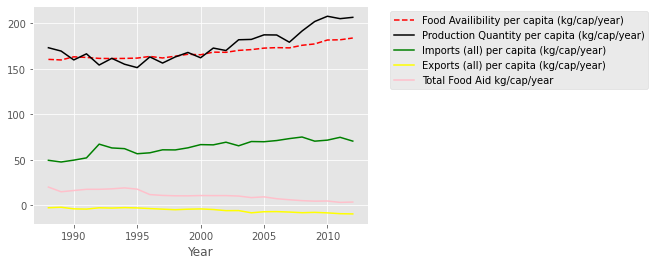

In [8]:
ax = AllLDC_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle= '--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
AllLDC_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
allLDC_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
allLDC_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
allLDC_aid.plot(x='Year', y= 'Total Food Aid', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')
#add net imports
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

2 Let us now look at specific **regions**

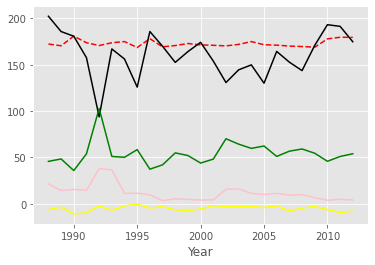

In [9]:
#Southern Africa 
SAf_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='Southern Africa']
SAf_food_availablity = SAf_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
SAf_food_availibility = SAf_df.reset_index(drop = True)
SAf_production = SAf_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
SAf_import = SAf_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
SAf_export = SAf_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
SAf_foodaid = SAf_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = SAf_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle= '--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
SAf_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
SAf_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
SAf_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
SAf_foodaid.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

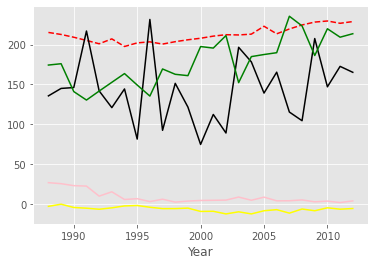

In [11]:
#North Africa
NAf_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='North Africa']
NAf_food_availablity = NAf_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
NAf_food_availibility = NAf_df.reset_index(drop = True)
NAf_production = NAf_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
NAf_import = NAf_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
NAf_export = NAf_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
NAf_foodaid = NAf_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = NAf_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
NAf_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
NAf_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
NAf_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
NAf_foodaid.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

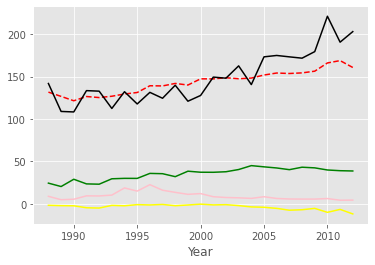

In [13]:
#Central Africa
CAf_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='Central Africa']
CAf_food_availablity = CAf_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
CAf_food_availibility = CAf_df.reset_index(drop = True)
CAf_production = CAf_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
CAf_import = CAf_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
CAf_export = CAf_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
CAf_foodaid = CAf_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = CAf_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
CAf_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
CAf_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
CAf_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
CAf_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

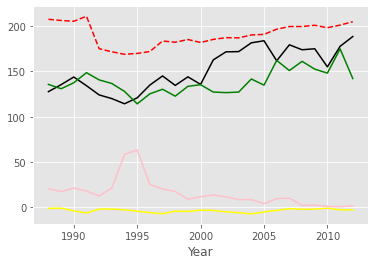

In [14]:
#Caucasus and Middle East
ME_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='Caucasus and Middle East']
ME_food_availablity = ME_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
ME_food_availibility = ME_df.reset_index(drop = True)
ME_production = ME_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
ME_import = ME_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
ME_export = ME_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
ME_foodaid = ME_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = ME_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
ME_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
ME_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
ME_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
ME_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

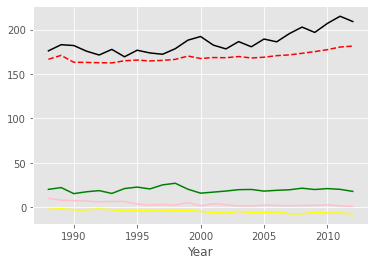

In [15]:
#South Asia
SAs_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='South Asia']
SAs_food_availablity = SAs_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
SAs_food_availibility = SAs_df.reset_index(drop = True)
SAs_production = SAs_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
SAs_import = SAs_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
SAs_export = SAs_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
SAs_foodaid = SAs_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = SAs_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
SAs_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
SAs_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
SAs_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
SAs_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

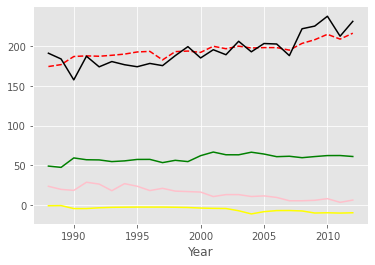

In [16]:
#West Africa
WAf_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='West Africa']
WAf_food_availablity = WAf_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
WAf_food_availibility = WAf_df.reset_index(drop = True)
WAf_production = WAf_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
WAf_import = WAf_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
WAf_export = WAf_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
WAf_foodaid = WAf_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = WAf_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)',linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
WAf_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
WAf_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
WAf_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
WAf_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

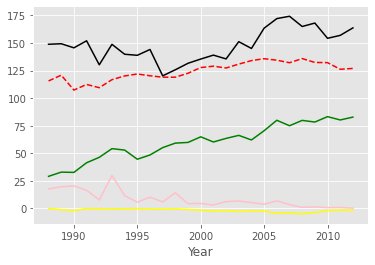

In [17]:
#South America
SAm_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='South America']
SAm_food_availablity = SAm_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
SAm_production = SAm_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
SAm_import = SAm_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
SAm_export = SAm_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
SAm_foodaid = SAm_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = SAm_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
SAm_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
SAm_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
SAm_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
SAm_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

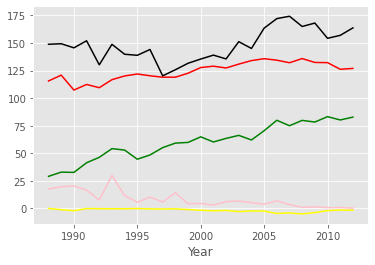

In [ ]:
#East Africa
EAf_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='South America']
EAf_food_availablity = EAf_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
EAf_food_availibility = EAf_df.reset_index(drop = True)
EAf_production = EAf_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
EAf_import = EAf_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
EAf_export = EAf_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
EAf_foodaid = EAf_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = EAf_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
EAf_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
EAf_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
EAf_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
EAf_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

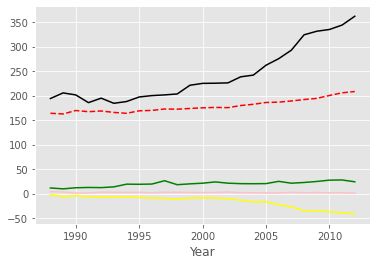

In [19]:
#South East Asia
SEAs_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='South East Asia']
SEAs_food_availablity = SEAs_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
SEAs_food_availibility = SEAs_df.reset_index(drop = True)
SEAs_production = SEAs_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
SEAs_import = SEAs_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
SEAs_export = SEAs_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
SEAs_foodaid = SEAs_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = SEAs_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
SEAs_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
SEAs_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
SEAs_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
SEAs_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

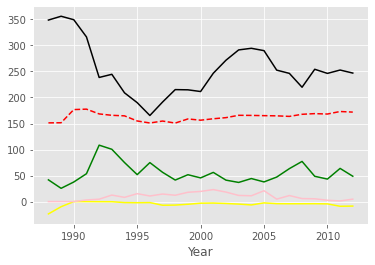

In [20]:
#Central and East Asia
Central_East_Asia_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='Central and East Asia']
Central_East_Asia_food_availablity = Central_East_Asia_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
Central_East_Asia_food_availibility = Central_East_Asia_df.reset_index(drop = True)
Central_East_Asia_production = Central_East_Asia_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
Central_East_Asia_import = Central_East_Asia_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
Central_East_Asia_export = Central_East_Asia_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
Central_East_Asia_foodaid = Central_East_Asia_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = Central_East_Asia_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
Central_East_Asia_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
Central_East_Asia_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
Central_East_Asia_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
Central_East_Asia_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')

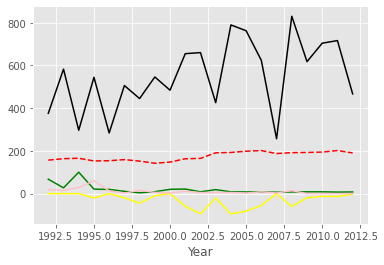

In [22]:
#Europe
Eu_df = df_no_missing_valuesr[df_no_missing_valuesr['Region'] =='Europe']
Eu_food_availablity = Eu_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
Eu_food_availibility = Eu_df.reset_index(drop = True)
Eu_production = Eu_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
Eu_import = Eu_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
Eu_export = Eu_df.groupby('Year')['Exports (all) per capita (kg/cap/year)'].mean()
Eu_foodaid = Eu_df.groupby('Year')['Total Food Aid kg/cap/year'].mean()
ax = Eu_food_availablity.plot(x='Year', y= 'Food Availibility per capita (kg/cap/year)', linestyle='--', c = 'red', label = 'Food Availibility per capita (kg/cap/year)')
Eu_production.plot(x='Year', y= 'Production Quantity per capita (kg/cap/year)', kind='line', c = 'black', ax=ax, label = 'Production Quantity per capita (kg/cap/year)')
Eu_import.plot(x='Year', y= 'Imports (all) per capita (kg/cap/year)', kind='line', c = 'green', ax=ax, label = 'Imports (all) per capita (kg/cap/year)')
Eu_export.plot(x='Year', y= 'Exports (all) per capita (kg/cap/year)', kind='line', c = 'yellow', ax=ax, label = 'Exports (all) per capita (kg/cap/year)')
Eu_foodaid.plot(x='Year', y= 'Total Food Aid kg/cap/year', kind='line', c = 'pink', ax=ax, label = 'Total Food Aid kg/cap/year')